# Analyse du dataset de Plonger 

## Importation des packages

In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Resumé du dataset

Lecture du csv

In [355]:
dataset = pd.read_csv('AIDA_Results_IA_Institut.csv')

Affichage des 10 premières lignes

In [356]:
dataset.head(10)

,Start,Diver,Gender,Discipline,Line,Official Top,AP,RP,Card,Points,Remarks,Title Event,Event Type,Day,Category Event
0,1,Tasos Grillakis (GRC),M,FIM,NaN,00:00,33,23 m,YELLOW,12.0,-,Depth Event 2016,Depth Competition,2016-07-17,other
1,2,Antonis Papantonatos (GRC),M,FIM,NaN,00:00,55,47 m,YELLOW,38.0,-,Depth Event 2016,Depth Competition,2016-07-17,other
2,3,Dimitris Koumoulos (GRC),M,CNF,NaN,00:00,55,55 m,WHITE,55.0,-,Depth Event 2016,Depth Competition,2016-07-17,other
3,4,Christos Papadopoulos (GRC),M,CWT,NaN,00:00,55,55 m,WHITE,55.0,OK,Depth Event 2016,Depth Competition,2016-07-17,other
4,5,Anna Chalari (GRC),F,CWT,NaN,00:00,15,15 m,WHITE,15.0,OK,Depth Event 2016,Depth Competition,2016-07-17,other
5,6,Alkisti Vouraki (GRC),F,CWT,NaN,00:00,16,16 m,WHITE,16.0,OK,Depth Event 2016,Depth Competition,2016-07-17,other
6,7,Stavroula Kontorousi (GRC),F,CWT,NaN,00:00,20,20 m,WHITE,20.0,OK,Depth Event 2016,Depth Competition,2016-07-17,other
7,8,Yuliya Ilkevich (BLR),F,CWT,NaN,00:00,40,31 m,YELLOW,21.0,"SHORT, TAG",Depth Event 2016,Depth Competition,2016-07-17,other
8,9,Dimitris Tsigkounis (GRC),M,CWT,NaN,00:00,40,26 m,YELLOW,11.0,"SHORT, TAG",Depth Event 2016,Depth Competition,2016-07-17,other
9,10,Emmanouil Marneros (GRC),M,CWT,NaN,00:00,47,47 m,WHITE,47.0,OK,Depth Event 2016,Depth Competition,2016-07-17,other


In [357]:
dataset.shape # taille du dataset

(26841, 15)

In [358]:
dataset.isna().sum() # analyse du nombre de valeurs nan dans chaque colonnes 

Start                 0
Diver                 0
Gender                0
Discipline            0
Line              22147
Official Top          0
AP                    0
RP                    0
Card                  0
Points                0
Remarks               5
Title Event           0
Event Type            0
Day                   0
Category Event        0
dtype: int64

## Nettoyage et Visualisation

### Observation du nettoyage à faire 

In [359]:
dataset = dataset.drop(['Line'], axis=1)
# on retire 'Line' puique composé majoritairement de NAN

In [360]:
non_numeric_df = dataset[['Diver','Gender', 'Discipline', 'Card', 'Remarks', 'Title Event', 'Event Type', 'Day', 'Category Event']]
numeric_df = dataset[['Official Top', 'AP', 'RP', 'Points']]

In [361]:
for col in non_numeric_df.columns :
    print(col, '\n', non_numeric_df[col].value_counts(), '\n')

Diver 
 William Trubridge (NZL)    139
Georgina Miller (GBR)      135
Alexey Molchanov (RUS)     121
Alejandro Lemus (MEX)      116
Ken Kiriyama (JPN)         109
                          ... 
Yu Keunsoo (KOR)             1
Ki.Pyeong Lim (KOR)          1
Sunggwang Jung (KOR)         1
Shaun Househam (GBR)         1
Laffay Sylvain (FRA)         1
Name: Diver, Length: 4656, dtype: int64 

Gender 
 M    17434
F     9407
Name: Gender, dtype: int64 

Discipline 
 CWT     10725
FIM      8075
CNF      4813
CWTB     3228
Name: Discipline, dtype: int64 

Card 
 WHITE     19189
YELLOW     4990
RED        2524
-           138
Name: Card, dtype: int64 

Remarks 
 OK                                     8628
Ok                                     7660
-                                      2597
PEN                                    2219
No tag,rp<ap                            657
                                       ... 
DQPulling                                 1
DQ Late Start                  

on decidera d'enlever les Divers car peux interressant pour de l'IA cela pourrai biaisais, on observe plus de 1000 valeurs pour les dates ce qui ne semble pas forcément pertinent, on enlevera aussi title event car on a event type ce qui est plus intéressant on garde aussi category event

In [362]:
numeric_df 

,Official Top,AP,RP,Points
0,00:00,33,23 m,12.0
1,00:00,55,47 m,38.0
2,00:00,55,55 m,55.0
3,00:00,55,55 m,55.0
4,00:00,15,15 m,15.0
...,...,...,...,...
26836,09:40,57,57 m,57
26837,09:50,52,52 m,52
26838,10:00,40,40 m,40
26839,10:10,33,28 m,22


on enlevera official top car on ne connais pas la localisation des horraires donc sur quel fuseaux il sont de plus meme si toute les données sont enregistrées sur le meme fuseaux ce ne sont pas les memes horraires selon la localisation donc un depart à 00:00 GTM sera 01:00 à Paris et encore diffenrt à New York et transformeta RP en entier

In [363]:
# on regarde si il existe des plongeur ayant un nom prenom et pays inferieur à 10 caratère
non_numeric_df[non_numeric_df['Diver'].str.len() < 10] 

,Diver,Gender,Discipline,Card,Remarks,Title Event,Event Type,Day,Category Event
2639,(),F,CWT,WHITE,OK,AIDA Pacific Cup 2002,Mixed Competition,2002-10-31,other
4687,(),F,CWT,YELLOW,PEN,4ème Manche Coupe d AIDA France 2004,Mixed Competition,2004-05-06,other
5119,(),F,CWT,RED,DQBO,World Championship 2012,World Championship,2012-09-09,World Championship
5695,(),F,CNF,WHITE,OK,2013 Kalamata Open,Depth Competition,2013-09-09,other
5696,(),F,CNF,WHITE,OK,2013 Kalamata Open,Depth Competition,2013-09-09,other
5697,(),F,CWT,WHITE,OK,2013 Kalamata Open,Depth Competition,2013-09-09,other
7124,(),F,FIM,YELLOW,PEN,(in progress) Bizzy Blue Hole 2009,Competition,2009-04-21,other
7782,(),F,FIM,WHITE,OK,little blue hole competition,Depth Competition,2012-09-28,other
7817,(),F,CWT,WHITE,OK,AIDA Red Sea World Cup,Mixed Competition,2012-08-20,World Championship
7818,(),F,FIM,WHITE,OK,AIDA Red Sea World Cup,Mixed Competition,2012-08-20,World Championship


on observe un plongeur sans nom on decide de supprimer ces lignes car on ne sait pas si il s'agit d'un seul ou plusieur plongeurs ainsi  lors de la creation des colonnes d'experiences cela pourrais biaisais le model dans le futur

In [364]:
# on regarde si il existe des dates inferieure a la taille standard des dates
non_numeric_df[non_numeric_df['Day'].str.len() < 10 ] 

,Diver,Gender,Discipline,Card,Remarks,Title Event,Event Type,Day,Category Event


In [365]:
# on regarde si il existe des dates superieur a la taille standard des dates
non_numeric_df[non_numeric_df['Day'].str.len() > 10 ] 

,Diver,Gender,Discipline,Card,Remarks,Title Event,Event Type,Day,Category Event


toute les dates on la meme tailles 

In [366]:
print(f"{[element for element in dataset.Day.unique()]}")

['2016-07-17', '2016-07-23', '2016-07-24', '2016-09-23', '2016-09-24', '2016-11-05', '2016-11-07', '2016-11-08', '2016-11-10', '2016-11-11', '2016-08-15', '2016-08-16', '2016-08-21', '2016-08-17', '2016-08-18', '2016-11-20', '2016-11-21', '2016-11-22', '2016-11-23', '2016-11-24', '2016-11-25', '2016-10-02', '2016-10-03', '2016-09-10', '2016-10-24', '2016-10-25', '2016-10-28', '2016-10-29', '2016-09-22', '2016-09-05', '2016-09-06', '2016-09-08', '2016-09-09', '2016-10-10', '2016-04-22', '2016-04-23', '2016-04-24', '2016-04-26', '2016-04-27', '2016-04-28', '2016-04-30', '2016-05-01', '2016-05-02', '2016-10-08', '2016-10-09', '2016-10-23', '2016-05-26', '2016-05-27', '2016-05-28', '2016-05-30', '2016-05-31', '2016-06-01', '2016-11-03', '2017-05-23', '2017-05-25', '2017-08-08', '2017-08-10', '2017-10-24', '2017-10-26', '2016-11-14', '2016-11-15', '2016-05-25', '2016-06-21', '2016-06-22', '2016-07-25', '2016-07-26', '2016-06-05', '2016-06-07', '2016-06-09', '2016-06-12', '2016-06-14', '2016

toutes les dates ont le memes formats et sont correcte

In [367]:
numeric_df[numeric_df['RP'].str.contains('-')]

,Official Top,AP,RP,Points
2340,00:00,70,-2 m,0.0
2343,00:00,54,-2 m,0.0
2357,00:00,51,-2 m,0.0
2364,00:00,62,-2 m,0.0
2382,00:00,70,-2 m,0.0
...,...,...,...,...
25697,12:48,70,-,-
25698,12:54,35,-,-
25699,13:00,70,-,-
25700,13:06,35,-,-


On garde le RP négatif pour donner une référence d'echec au programme de machine learning. \
Cependant les tirets qui ne représentent rien sont retirés en les transformant en NAN puis drop. \
On enlevera les points donc on les transformera pas afin d'eviter une perte de lignes qui seraient correct pour le reste

### Nettoyage

In [368]:
dataset = dataset[dataset['Diver'] != '()'] # on enleve les () du dataset
dataset['RP'] = dataset['RP'].replace('-', np.nan) # on remplace les - par de NaN afin de les drops
dataset['Card'] = dataset['Card'].replace('-', np.nan) # on remplace les - par de NaN afin de les drops
dataset = dataset.dropna()
dataset['RP'] = dataset['RP'].str.split(' ').str[0].astype(int) # on recupère uniquement les chiffres et on les transformes en entiers

### Visualisation graphique

In [369]:
# on créer la collonne Year afin de faires des graphiques par années
dataset['Year'] = pd.to_datetime(dataset['Day']).dt.year

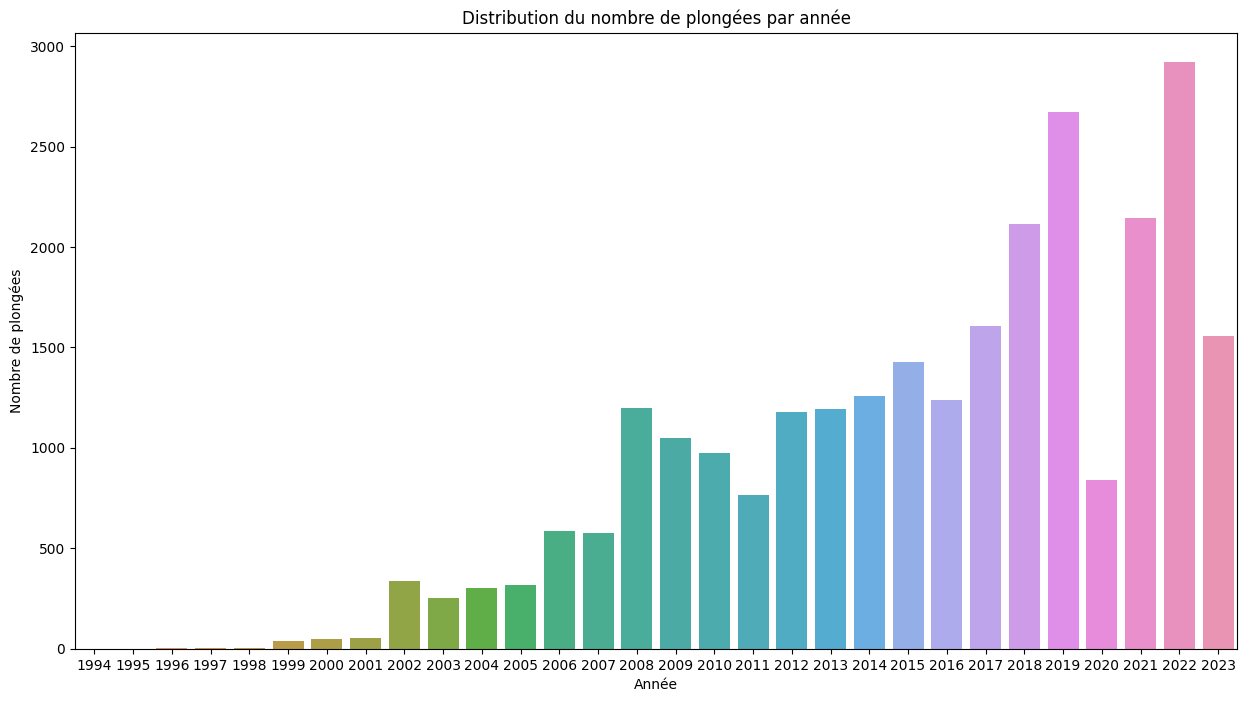

In [370]:
# Distribution du nombre de plongées par année

plt.figure(figsize=(15, 8))
sns.countplot(x='Year', data=dataset)
plt.title('Distribution du nombre de plongées par année')
plt.xlabel('Année')
plt.ylabel('Nombre de plongées')
plt.show()

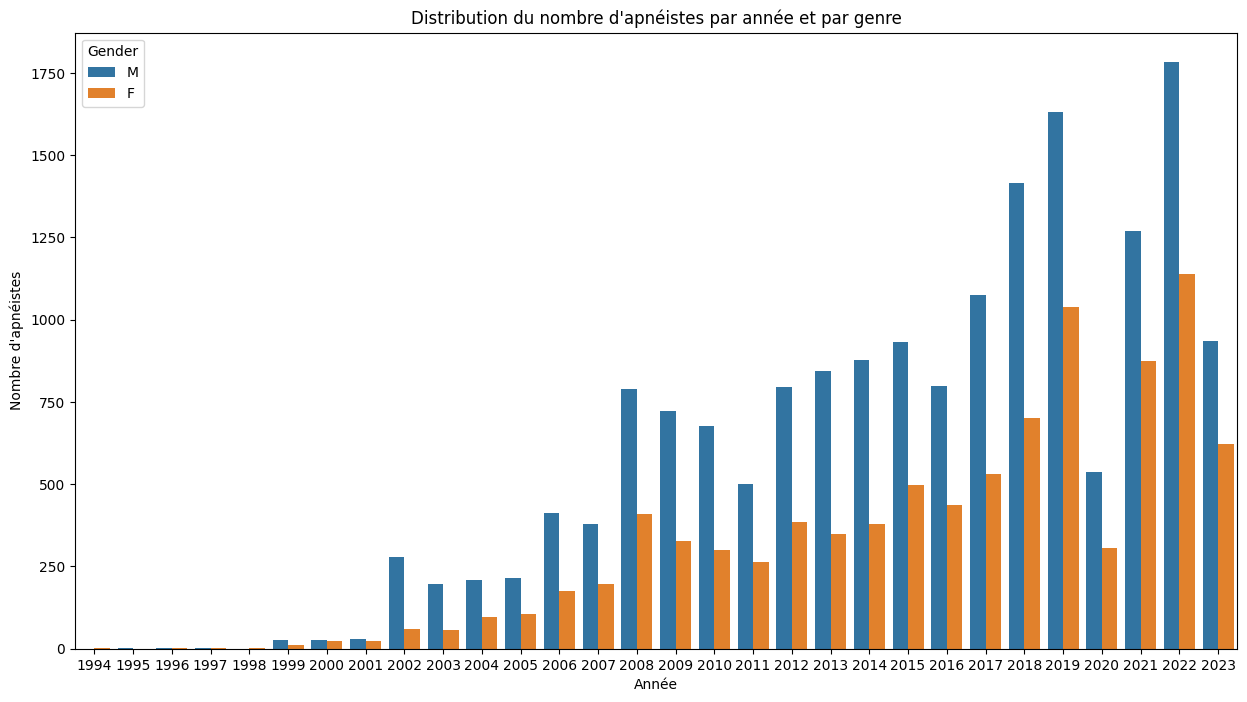

In [371]:
# Distribution du nombre d'apnéistes par année et par genre

plt.figure(figsize=(15, 8))
sns.countplot(x='Year', hue='Gender', data=dataset)
plt.title('Distribution du nombre d\'apnéistes par année et par genre')
plt.xlabel('Année')
plt.ylabel('Nombre d\'apnéistes')
plt.show()

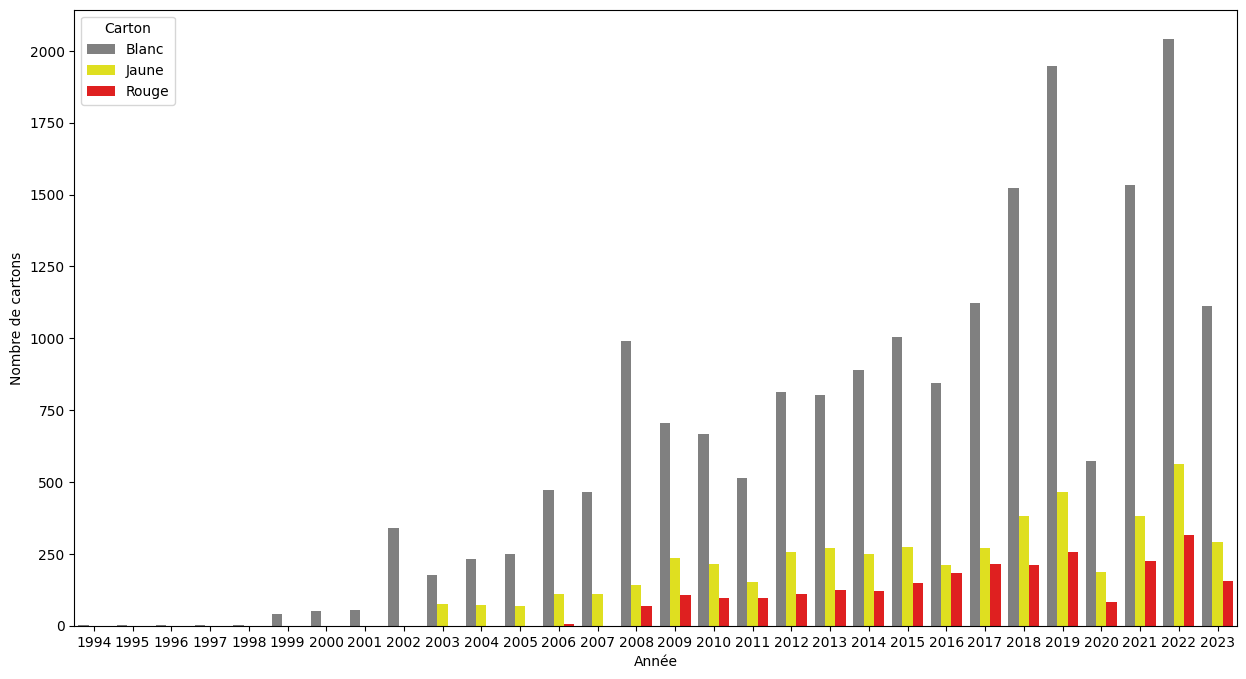

In [372]:
# Distribution du nombre de cartons blancs/jaunes/rouges par année

plt.figure(figsize=(15, 8))
# Define a color palette with white, yellow, and red
colors = ["gray", "yellow", "red"]
sns.countplot(x='Year', hue='Card', data=dataset, hue_order=['WHITE', 'YELLOW', 'RED'],palette=colors)
plt.xlabel('Année')
plt.ylabel('Nombre de cartons')
plt.legend(title='Carton', loc='upper left', labels=['Blanc', 'Jaune', 'Rouge'])
plt.show()

## Transformation des données

### Transformation des données catégoriques en numérique

In [373]:
dataset['Gender'] = dataset['Gender'].replace(('M', 'F'), (1,0)) # 1 remplace Male et 0 remplace Female

In [374]:
dataset['Discipline'] = dataset['Discipline'].replace(('CNF','FIM','CWT','CWTB'),((1,2,3,4))) 
# remplacement :
#   CNF  -> 1
#   FIM  -> 2
#   CWT  -> 3
#   CWTB -> 4

In [375]:
dataset['Card'] = dataset['Card'].replace(('WHITE','YELLOW','RED'),(1,2,3)) # white :1 / yellow :2 / red :3

In [376]:
dataset['Event Type'] = dataset['Event Type'].replace(('Depth Competition','Mixed Competition','World Championship','Competition','Pool Competition','Worldrecord attempt','Team Competition'),(1,2,3,4,5,6,7))
# replacement:
#   Depth Competition   -> 1
#   Mixed Competition   -> 2
#   World Championship  -> 3
#   Competition         -> 4
#   Pool Competition    -> 5
#   Worldrecord attempt -> 6
#   Team Competition    -> 7

In [377]:
dataset['Category Event'] = dataset['Category Event'].replace(('other','World Championship','VB','Panglao','NAC'),(0,1,2,3,4))
# renplacement
#   other               -> 0
#   World Chimpionship  -> 1
#   VB                  -> 2
#   Panglao             -> 3
#   NAC                 -> 4

### Création de caractéristiques

On récupère le mois en considérant les données de Day en string pour séparer les élément et conserver seukement la partit qui donne le mois.

In [378]:
dataset['MONTH'] = dataset['Day'].str.split('-').str[1].astype(int)


In [379]:
dataset[(dataset['MONTH'] > 12) & (dataset['MONTH'] < 1)] # verification que les mois sont correcte 

,Start,Diver,Gender,Discipline,Official Top,AP,RP,Card,Points,Remarks,Title Event,Event Type,Day,Category Event,Year,MONTH


In [380]:
dataset['Day'] = pd.to_datetime(dataset['Day'])

# Trier le DataFrame par date
dataset.sort_values(by='Day', inplace=True)

# Expérience totale de plongée par athlète
experience_dive = dataset.groupby('Diver')['Day'].cumcount() + 1

# Expérience totale de plongée par athlète et par discipline
experience_discipline = dataset.groupby(['Diver', 'Discipline'])['Day'].cumcount() + 1

# Ajouter les colonnes d'expérience au DataFrame d'origine
dataset['experience_dive'] = experience_dive
dataset['experience_discipline'] = experience_discipline

dataset

,Start,Diver,Gender,Discipline,Official Top,AP,RP,Card,Points,Remarks,Title Event,Event Type,Day,Category Event,Year,MONTH,experience_dive,experience_discipline
8929,1,Deborah Andollo (CUB),0,3,00:00,61,61,1,61.0,OK,WR Attempt - ANDOLLO Deborah (CWT),6,1994-06-12,0,1994,6,1,1
3716,1,Umberto Pelizzari (ITA),1,3,00:00,72,72,1,72.0,OK,WR Attempt - PELIZZARI Umberto (CWT),6,1995-09-17,0,1995,9,1,1
3713,1,Deborah Andollo (CUB),0,3,00:00,62,62,1,62.0,OK,WR Attempt - ANDOLLO Deborah,6,1996-10-05,0,1996,10,2,2
5021,1,Michael Oliva (FRA),1,3,00:00,72,72,1,72.0,OK,WR Attempt - OLIVA Michael (CWT),6,1996-10-11,0,1996,10,1,1
3717,1,Alejandro Ravelo (CUB),1,3,00:00,73,73,1,73.0,OK,WR Attempt - RAVELO Alejandro (CWT),6,1997-08-02,0,1997,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26779,7,Alhadoom Almheiri (ARE),1,1,19:33,30,28,2,25.0,"Rpap,no tag",Apnea Pirates AIDA Cup - July 2023,2,2023-07-30,0,2023,7,2,2
26780,8,Firas Fayyad (PSE),1,1,19:41,30,30,1,30.0,Ok,Apnea Pirates AIDA Cup - July 2023,2,2023-07-30,0,2023,7,4,1
26781,9,Ahmed Abdulla (BHR),1,3,19:49,41,41,1,41.0,Ok,Apnea Pirates AIDA Cup - July 2023,2,2023-07-30,0,2023,7,2,1
26782,10,Dmitry Kataya (INT),1,2,19:57,37,37,1,37.0,Ok,Apnea Pirates AIDA Cup - July 2023,2,2023-07-30,0,2023,7,2,1


On enlève aussi Points et Remarks car ici notre IA cherchera a predire le carton et non les points ou remarques

In [381]:
df = dataset.drop(['Start','Diver', 'Title Event', 'Official Top', 'Day', 'Points', 'Remarks'],axis=1)
df.index = [i for i in range(df.shape[0])]
df

,Gender,Discipline,AP,RP,Card,Event Type,Category Event,Year,MONTH,experience_dive,experience_discipline
0,0,3,61,61,1,6,0,1994,6,1,1
1,1,3,72,72,1,6,0,1995,9,1,1
2,0,3,62,62,1,6,0,1996,10,2,2
3,1,3,72,72,1,6,0,1996,10,1,1
4,1,3,73,73,1,6,0,1997,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...
26667,1,1,30,28,2,2,0,2023,7,2,2
26668,1,1,30,30,1,2,0,2023,7,4,1
26669,1,3,41,41,1,2,0,2023,7,2,1
26670,1,2,37,37,1,2,0,2023,7,2,1


### Normalisation des données

On normalise avec $X_{normalisée} = \frac{X - X_{moyenne}}{X_{ecart-type}}$

In [382]:
df = df.apply(lambda x: (x - x.mean()) / x.std(), axis=0) 
df.head(10)

,Gender,Discipline,AP,RP,Card,Event Type,Category Event,Year,MONTH,experience_dive,experience_discipline
0,-1.365805,0.588085,0.326694,0.448358,-0.577367,4.816592,-0.548914,-3.861481,-0.582816,-0.653801,-0.560378
1,0.732142,0.588085,0.793148,0.915340,-0.577367,4.816592,-0.548914,-3.682548,0.683191,-0.653801,-0.560378
2,-1.365805,0.588085,0.369099,0.490811,-0.577367,4.816592,-0.548914,-3.503615,1.105193,-0.589243,-0.421676
3,0.732142,0.588085,0.793148,0.915340,-0.577367,4.816592,-0.548914,-3.503615,1.105193,-0.653801,-0.560378
4,0.732142,0.588085,0.835553,0.957793,-0.577367,4.816592,-0.548914,-3.324682,0.261188,-0.653801,-0.560378
5,0.732142,0.588085,0.920362,1.042699,-0.577367,4.816592,-0.548914,-3.324682,0.683191,-0.589243,-0.421676
6,-1.365805,0.588085,-2.260006,0.618170,-0.577367,4.816592,-0.548914,-3.324682,1.949198,-0.524686,-0.282974
7,-1.365805,0.588085,-0.775834,-0.655418,-0.577367,4.816592,-0.548914,-3.145749,0.683191,-0.653801,-0.560378
8,-1.365805,0.588085,0.581123,0.703076,-0.577367,4.816592,-0.548914,-3.145749,0.683191,-0.653801,-0.560378
9,0.732142,0.588085,-2.260006,0.405905,-0.577367,2.680529,-0.548914,-2.966816,-2.692828,-0.653801,-0.560378


cleanning

Sélectionner les colonnes pertinentes au problèmes (indice: les numériques, et celles
connues avant une plongée)

4. Normaliser les données pour que toutes les colonnes soient comparables en terme
de distance euclidienne

5. Appliquer deux méthodes de clustering (K-means et DBSCAN) pour détecter si
plusieurs profils de plongée se dessine :

a. sur les plongées qui ont obtenu un carton Rouge (card==RED)

b. sur les plongées qui ont obtenu un carton Blanc (card==WHITE) (pour
comprendre l'effet inverse, lorsque les plongées se passent bien)

6. Décrire et visualiser les résultats obtenus (vous pouvez afficher selon 2 ou 3
caractéristiques). Quels sont les différents clusters trouvés et leurs caractéristiques?

7. Expliquer comment vous avez choisi les hyperparamètres de chacune des méthodes

a. ￼le nombre de clusters pour K-means. Utiliser la méthode du coude, Elbow
method)

b. La densité pour DBSCAN

8. Commenter les résultats obtenus, pour et contre chaque méthode. Est-ce que les
méthodes de clustering sont adaptées au problème

Prédire si le résultat d’une plongée va être un carton blanc, jaune, rouge selon les
caractéristiques qui paraissent pertinentes au problème. Utiliser le classifieur SVM
avec différents noyaux.

2. Justifier vos choix (en phrase et par de la visualisation si nécessaire).

3. Créer un tableau récapitulant vos différents résultats.

4. Commenter les résultats obtenus.

5. Explorer d'autres pistes de classifieurs (au moins un) et comparer les résultats